### ETAS: Taiwan 2018
#### 6 February 2018  15:50:42 UTC m=6.4
2018-02-06 15:50:42 (UTC)
24.174°N 121.653°E

#### 4 February 2018  13:56:42 UTC m=6.4
2018-02-04 13:56:42 (UTC)
24.160°N 121.678°E



In [1]:
#
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import datetime as dtm
import matplotlib.dates as mpd
import pytz
tzutc = pytz.timezone('UTC')

#import operator
import math
import random
import numpy
import scipy
import scipy.optimize as spo
from scipy import interpolate
import itertools
import sys
#import scipy.optimize as spo
import os
import operator
#from PIL import Image as ipp
import multiprocessing as mpp
#
import matplotlib
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import json
import pickle
#
import geopy.distance
#from geopy.distance import vincenty
#from geopy.distance import great_circle
#
#import shapely.geometry as sgp
#
from mpl_toolkits.basemap import Basemap as Basemap
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from geographiclib.geodesic import Geodesic as ggp
#
#import ANSStools as atp
from yodiipy import ANSStools as atp
#
import contours2kml
import globalETAS as gep
import global_etas_auto as ggep
from eq_params import *
#
from nepal_figs import *
import optimizers
#
import random
import geopy

#
# on a fresh linux install... (can we script this?)
# stuff we have to do besides just clone this:
# pip install geopy
# conda install basemap
# pip install geographiclib
# conda install -c ioos rtree


failed while loading urllib and/or urllib. maybe python 3.x?


/home/myoder/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:938: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [3]:
# event was some time on the 24th or maybe late the 23rd. this, plus defaults, should find the event:
#to_dt = dtm.datetime(2016,8,25, tzinfo=pytz.timezone('UTC'))
to_dt = dtm.datetime.now(pytz.timezone('UTC'))
#mainshock_dt = dtm.datetime(2017, 11, 12, 18,18,17, tzinfo=pytz.timezone('UTC'))
#
Lr_factor = 10.
#
# newest event:
t0 = dtm.datetime(2018, 2, 4, 13, 56, 42, tzinfo=pytz.timezone('UTC'))
t_ms = t0
#Location
lon0 = 121.678
lat0 = 24.160   
#
m0 = 6.4
d_lat = 7.
d_lon = 7.
#
lats = [lat0-d_lat, lat0+d_lat]
lons = [lon0-d_lon, lon0+d_lon]


In [4]:
#etas = ggep.auto_etas(to_dt=to_dt, Lr_factor=Lr_factor, dt_0=5)
#italy_prams = {'do_recarray': True, 'D_fract': 1.5,
#                't_0':dtm.datetime(1990, 1, 1, 0, 0, tzinfo=pytz.timezone('UTC')),
#                't_now':to_dt, 
#                'lats': [42.,43.5], 'p': 1.1, 'b1': 1.0, 'mc': 2.5, 'q': 1.5,
#                'lons': [12.,15.], 'dmstar': 1.0, 'b2': 1.5, 'd_tau': 2.28,
#                'incat': None, 'fit_factor': 2.0, 'd_lambda': 1.76}
cat_len_days = 3650
eq_prams = {'do_recarray': True, 'D_fract': 1.5,
               't_0':dtm.datetime(1990, 1, 1, 0, 0, tzinfo=pytz.timezone('UTC')),
               't_now':to_dt, 'cat_len':3650,
               'd_lat': .1, 'd_lon':.1, 'mc':2.5,
               'lats': lats, 'p': 1.1, 'b1': 1.0, 'q': 1.5,
               'lons': lons, 'dmstar': 1.0, 'b2': 1.5, 'd_tau': 2.28,
               'incat': None, 'fit_factor': 2.0, 'd_lambda': 1.76,
               'etas_range_factor': 25.0, 'etas_range_padding':3.}

#nz_cat0 = test_cat = atp.cat_from_geonet(lats=lats, lons=lons, m_c=2.5, date_from=dtm.datetime(2000,1,1,tzinfo=atp.tzutc),
#                              date_to=dtm.datetime.now(atp.tzutc))
#nz_cat = gep.make_ETAS_catalog_mpp(incat=nz_cat0)
#
# TODO: integrate this directly into the globalETAS() class...
#my_cat = None
my_cat = atp.cat_from_anss_and_usgs(lons=lons, lats=lats, mc=eq_prams['mc'], cat_len_days=cat_len_days, 
                                    Nmax=None, rec_array=True)
if not my_cat is None:
    my_cat = gep.make_ETAS_catalog_mpp(incat=my_cat)
#
etas_name = 'Taiwan, February 2018'
f_path = '/home/myoder/Dropbox/Research/etas/Taiwan_February_2018_02_04/etas_{}'.format(eq_prams['t_now'])
f_root = 'etas_Taiwan_20180204'

print('etas_name: {}'.format(etas_name))
print('f_path: {}'.format(f_path))
print('f_root: {}'.format(f_root))



url_str: http://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/2.5_week.csv
data handle fetched...
 no file.
etas_prams:  {'do_recarray': False, 'b2': 1.5, 'b1': 1.0, 'dmstar': 1.0, 'q': 1.5, 'p': 1.1, 'fit_factor': 1.5, 'd_tau': 2.28, 'd_lambda': 1.76, 'D_fract': 1.5, 'date_range': ['1990-1-1', None], 'mc': 2.5, 'lons': [-117.0, -114.0], 'lats': [32.0, 38.0], 'incat': None}
results fetched.
etas_name: Taiwan, February 2018
f_path: /home/myoder/Dropbox/Research/etas/Taiwan_February_2018_02_04/etas_2018-02-07 23:19:15.908815+00:00
f_root: etas_Taiwan_20180204


### Now run (not-)ETAS:
- Note: we might have compiled a composite catalog from ANSS and USGS above. decide if we really want to do that.
  - To use just the ANSS catalog, pass catalog=None, or set my_cat=None before we execute. For domestic events, this is probably the better bet, but only by a little bit. For overseas events, ANSS can take weeks to update, so using the USGS concatenation is a good thing.

In [5]:
#etas = gep.ETAS_mpp(n_cpu=2*mpp.cpu_count(), catalog=nz_cat, **eq_prams)
etas = gep.ETAS_mpp(n_cpu=2*mpp.cpu_count(), catalog=my_cat, **eq_prams)
#
# we've run this; we can reload it from pickle:
#with open('data/etas_201610.pkl', 'rb') as fin:
#    etas = pickle.load(fin)
#

begin globalETAS.__init()__
Overriding t_0 (etas catalog start date/time) for ETAS calculations. using catalog start, t_0 = t_now - catlen (3650.000000) = 2008-02-10 23:19:15.908815+00:00
ETAS over etas_cat_range/xyz_range:  ([0, 2544], None)
make_etas():
etas_mpp worker xyz_range:  [0, 2450]
begin globalETAS.__init()__
Overriding t_0 (etas catalog start date/time) for ETAS calculations. using catalog start, t_0 = t_now - catlen (3650.000000) = 2008-02-10 23:19:15.908815+00:00
ETAS over etas_cat_range/xyz_range:  ([0, 2544], [0, 2450])
etas_mpp worker xyz_range:  [2450, 4900]
begin globalETAS.__init()__
Overriding t_0 (etas catalog start date/time) for ETAS calculations. using catalog start, t_0 = t_now - catlen (3650.000000) = 2008-02-10 23:19:15.908815+00:00
ETAS over etas_cat_range/xyz_range:  ([0, 2544], [2450, 4900])
etas_mpp worker xyz_range:  [4900, 7350]
begin globalETAS.__init()__
Overriding t_0 (etas catalog start date/time) for ETAS calculations. using catalog start, t_0 = t

In [6]:
#print(etas.t0, etas.t_now, etas.t_forecast, etas.catalog[-1])
print(to_dt)
print(etas.t_0, mpd.num2date(etas.t_forecast), etas.t_now, t_ms)
#print(etas.catalog[-5:])
#
print('t_now: ', etas.t_now, max(etas.catalog['event_date']))

2018-02-07 23:19:15.908815+00:00
2008-02-10 23:19:15.908815+00:00 2018-02-07 23:19:15.908811+00:00 2018-02-07 23:19:15.908815+00:00 2018-02-04 13:56:42+00:00
t_now:  2018-02-07 23:19:15.908815+00:00 2018-02-07T15:21:31.000790


/home/myoder/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()


ms:  {'mag': 7.9, 'lon': 121.678, 'lat': 24.16, 'event_date': datetime.datetime(2018, 1, 23, 9, 31, 42, tzinfo=<UTC>)} 121.678 24.16


/home/myoder/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3260: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/myoder/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3269: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
/home/myoder/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3222: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/myoder/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3231: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


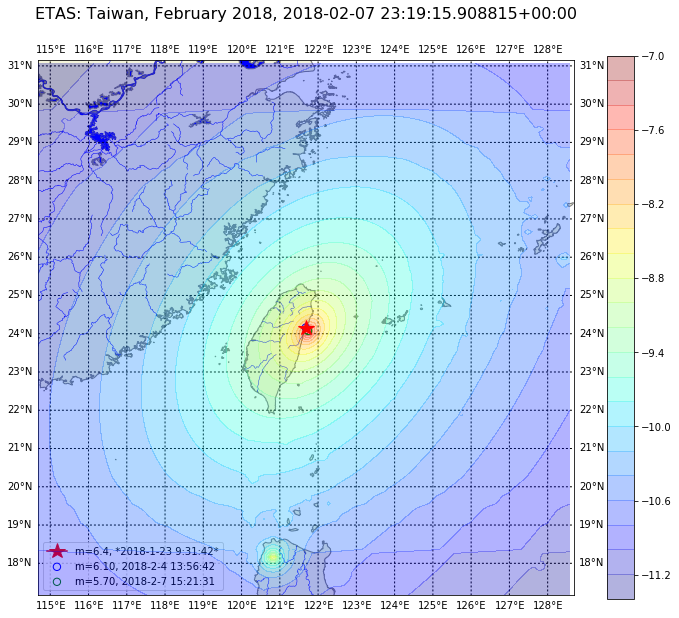

In [7]:
fg=plt.figure(0, figsize=(12,10))
ax=plt.gca()
etas.make_etas_contour_map(n_contours=25, fignum=0, map_resolution='f', alpha=.3, ax=ax)
#
#mainshock = sorted(etas.catalog, key=lambda rw: rw['mag'])[-1]
#print('mainshock: ', mainshock)
# get mainshock. it's an m>6 event in the last week or so... this is subjective.
# if we just look for the biggest event, we get the L'Aquila event, so we'll need to be more creative...
# or just specify it.

#mainshock = etas.catalog[-1]
mainshock = {'mag':7.9, 'lon':lon0, 'lat':lat0, 'event_date':dtm.datetime(2018,1,23,9, 31, 42, tzinfo=pytz.timezone('UTC'))}
# 2017-11-12 18:18:17 UTC 34.886°N 45.941 W 23.2 km
#
for j,eq in enumerate(reversed(etas.catalog)):
    #print('*** ', pytz.utc.localize(eq['event_date'].astype(dtm.datetime)))
    if pytz.utc.localize(eq['event_date'].astype(dtm.datetime))<etas.t_now-dtm.timedelta(days=180): break
    if eq['mag']>=mainshock['mag']:
        mainshock = eq
        #
    #
#
print('ms: ', mainshock, mainshock['lon'], mainshock['lat'])
x,y = etas.cm(mainshock['lon'], mainshock['lat'])

#print('mm: ', max(etas.catalog['mag']))

#
# let's get everything m>6 in the last 6 months?
m6s = [rw for rw in etas.catalog if rw['mag'] >= 5.5
       and pytz.utc.localize(rw['event_date'].astype(dtm.datetime))>t_ms-dtm.timedelta(days=180)]

# plot mainshock:
dt = (mainshock['event_date'].astype(dtm.datetime) if isinstance(mainshock['event_date'], numpy.datetime64)
      else mainshock['event_date'])
#
#dt=t0
dt_str = '{}-{}-{} {}:{}:{}'.format(dt.year, dt.month, dt.day, dt.hour, dt.minute, dt.second)
#etas.cm.plot([x], [y], latlon=False, marker='*', color='r', ms=16, zorder=11,
#                   label='m={}, {}'.format(mainshock['mag'], dt_str))
etas.cm.plot([mainshock['lon']], [mainshock['lat']], latlon=False, marker='*', color='r', ms=16, zorder=11,
                   label='m={}, *{}*'.format(m0, dt_str))

ax.set_title('ETAS: {}, {}\n\n'.format(etas_name, etas.t_now), size=16)
#for j,m6 in enumerate(m6s):
for j,m6 in enumerate(sorted(sorted(m6s, key=lambda rw:rw['mag'])[:-1], key=lambda rw:rw['event_date'])):
    clr = colors_[j%len(colors_)]
    #
    dt = m6['event_date'].astype(dtm.datetime)
    dt_str = '{}-{}-{} {}:{}:{}'.format(dt.year, dt.month, dt.day, dt.hour, dt.minute, dt.second)
    etas.cm.scatter(m6['lon'], m6['lat'], s=3*(m6['mag']+12.), edgecolors=clr, latlon=False,
                          c='none', marker='o', zorder=11, label='m={:.2f}, {}'.format(m6['mag'], dt_str))
    #
plt.gca().legend(loc=0)

(0, 26.761763454851462)

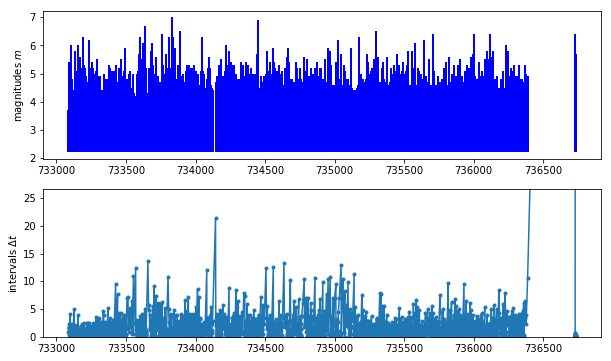

In [8]:
plt.figure(figsize=(10,6))
plt.clf()
ax1 = plt.subplot('211')
ax2 = plt.subplot('212', sharex=ax1)
#ax1.plot(etas.catalog['event_date'], etas.catalog['mag'], marker='.', ls='-', label='mag')
f_dates = [mpd.date2num(x.astype(dtm.datetime)) for x in etas.catalog['event_date']]
ax1.vlines(f_dates, (min(etas.catalog['mag'])-.5)*numpy.ones(len(etas.catalog)), 
           etas.catalog['mag'], lw=2., label='mag', color='b')
ax2.plot(f_dates[1:], numpy.diff(f_dates,1), '.-')

ax2.set_ylabel('intervals $\Delta t$')
ax1.set_ylabel('magnitudes $m$')
ax2.set_ylim(0, 1.25*sorted(numpy.diff(f_dates))[-2])

/home/myoder/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()
/home/myoder/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3260: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/myoder/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3269: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
/home/myoder/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3222: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/myoder/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3231: MatplotlibDeprecationWarning: ax

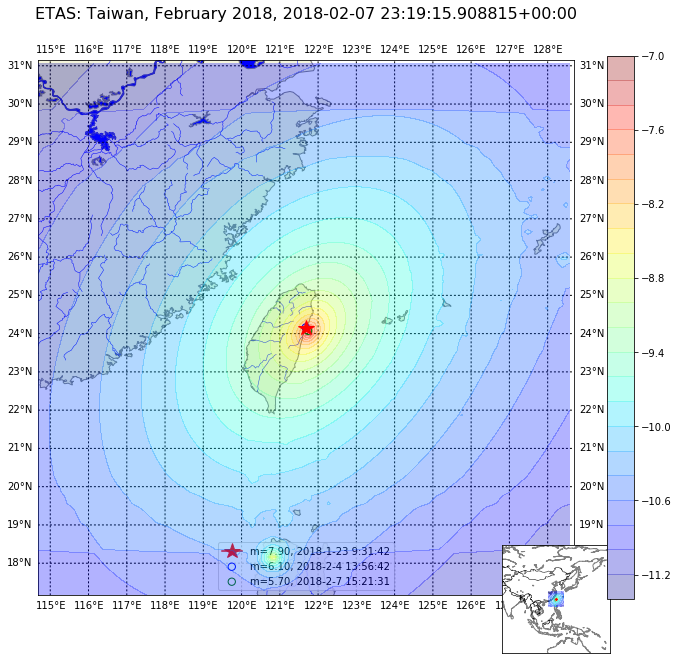

In [9]:
fg=plt.figure(0, figsize=(12,10))
ax=plt.gca()
ax_mini = fg.add_axes([.65,.05, .15, .15])
cmap='jet'
etas.make_etas_contour_map(n_contours=25, fignum=0, map_resolution='i', alpha=.3, ax=ax, lats_map=etas.lats,
                          lons_map=etas.lons, map_cmap=cmap)

# etas.make_etas_contour_map(n_contours=25, fignum=0, map_resolution='l', alpha=.3, ax=ax_mini, lats_map=[-89., 89.],
#                           lons_map=[-180., 180.], lat_interval=10., lon_interval=10.)

ll_lon_mini = max(-180, lon0-50.)
ll_lat_mini = max(-89, lat0-50)
ur_lon_mini = min(180., lon0+50.)
ur_lat_mini = min(89, lat0+50)
mp_mini = Basemap(llcrnrlon=ll_lon_mini, llcrnrlat=ll_lat_mini,
                                urcrnrlon=ur_lon_mini, urcrnrlat=ur_lat_mini,
                  resolution='l', projection=etas.cm.projection, lon_0=0., lat_0=0., ax=ax_mini)
mp_mini.drawcoastlines(color='gray', zorder=1)
mp_mini.drawcountries(color='black', zorder=1)

mp_mini.plot([x], [y], latlon=False, marker='*', color='r', ms=2, zorder=24)
#
X,Y = etas.cm(numpy.array(etas.lonses), numpy.array(etas.latses))
Z = numpy.log10(etas.lattice_sites)
#ax_mini.set_ylim(ll_lat_mini, ur_lat_mini)
#ax_mini.set_xlim(ll_lon_mini, ur_lon_mini)
#
etas_contours = ax_mini.contourf(X,Y, Z, 15, zorder=8, alpha=.3, cmap=cmap)
#
# let's get everything m>6 in the last 6 months?
m6s = [rw for rw in etas.catalog if rw['mag'] >= 5.5 
       and pytz.utc.localize(rw['event_date'].astype(dtm.datetime))>to_dt-dtm.timedelta(days=120)]
#
# plot mainshock:
dt = (mainshock['event_date'].astype(dtm.datetime) if isinstance(mainshock['event_date'], numpy.datetime64)
      else mainshock['event_date'])
dt_ms_str = '{}-{}-{} {}:{}:{}'.format(dt.year, dt.month, dt.day, dt.hour, dt.minute, dt.second)
etas.cm.plot([x], [y], latlon=False, marker='*', color='r', ms=16, zorder=11,
                   label='m={:.2f}, {}'.format(mainshock['mag'], dt_ms_str))
ax.set_title('ETAS: {}, {}\n\n'.format(etas_name, etas.t_now), size=16)
#for j,m6 in enumerate(m6s):
for j,m6 in enumerate(sorted(sorted(m6s, key=lambda rw:rw['mag'])[:-1], key=lambda rw:rw['event_date'])):
    clr = colors_[j%len(colors_)]
    #
    dt = m6['event_date'].astype(dtm.datetime)
    dt_str = '{}-{}-{} {}:{}:{}'.format(dt.year, dt.month, dt.day, dt.hour, dt.minute, dt.second)
    etas.cm.scatter(m6['lon'], m6['lat'], s=3*(m6['mag']+12.), edgecolors=clr, 
                          c='none', marker='o', zorder=11, label='m={:.2f}, {}'.format(m6['mag'], dt_str))
    #
ax.legend(loc=0)

In [10]:
#print(['{},{}\n'.format(rw['event_date'], rw['mag'] ) for rw in etas.catalog if rw['mag'] >= 5.5])
#len(['{},{}\n'.format(rw['event_date'], rw['mag'] ) for rw in etas.catalog if rw['mag'] >= 5.5
#     and rw['event_date'].astype(dtm.datetime)>dtm.datetime(2016,10,20)])

print(dt, type(dt), dt.year)

2018-02-07 15:21:31.000790 <class 'datetime.datetime'> 2018


In [11]:
for rw in m6s:
    print(rw)

(datetime.datetime(2018, 2, 4, 13, 56, 42, 150), 24.159500122070312, 121.67769622802734, 6.099999904632568, 11.970000267028809, 736729.5810416684, 19.498443856732834, 108.33662632554994, 0.00048266125456935193, 5.888435907030248, 11.287706696307781, 0.01971240093389868, 1.0, 1.1, 1.5, array([ 0.0105175 ,  0.02099979]), array([[-0.78294262, -0.62209393],
       [ 0.62209393, -0.78294262]]), 176.0)
(datetime.datetime(2018, 2, 6, 15, 50, 42, 400), 24.1737003326416, 121.65299987792969, 6.400000095367432, 10.640000343322754, 736731.6602083379, 27.542290057409634, 227.09317541294857, 0.00016708130503386164, 8.317638624268561, 25.270040534855344, 0.00911463560803527, 1.0, 1.1, 1.5, array([ 0.01377299,  0.03486339]), array([[-0.85709863, -0.51515234],
       [ 0.51515234, -0.85709863]]), 218.0)
(datetime.datetime(2018, 2, 7, 15, 21, 31, 790), 24.072099685668945, 121.73860168457031, 5.699999809265137, 15.0, 736732.6399421388, 12.302685006556908, 40.383483295827105, 0.001985767040937913, 3.71535

In [12]:
## hey, pickling works with the new ETAS objects (or at least it appears to...):
# with open('data/etas_201610.pkl', 'wb') as fpkl:
#     pickle.dump( etas, fpkl)    
#
#with open('data/etas_201610.pkl', 'rb') as fin:
#    etas2 = pickle.load(fin)
#
#print(etas2.catalog[0:5])
# TODO: we want the datetime part of the filename to come from the etas object itself, for purposes of
# integrity. BUT, we want this script to be a bit more portable, so we should replace all the etas
# references/object name to just 'etas'
#
etas.export_kml(os.path.join(f_path, '{}_{}.kml'.format(f_root, str(etas.t_now).replace(' ', '_'))), 
                kml_contours_bottom=.25, kml_contours_top=1.0)

etas.export_xyz(os.path.join(f_path, '{}_{}.xyz'.format(f_root, str(etas.t_now).replace(' ', '_'))))
fg.savefig(os.path.join(f_path, '{}_{}.png'.format(f_root, str(etas.t_now).replace(' ', '_'))))

with open (os.path.join(f_path, '{}_{}.pkl'.format(f_root, str(etas.t_now).replace(' ', '_'))), 'wb') as fpkl:
    pickle.dump(etas, fpkl)

kml bottom, top:  5 22


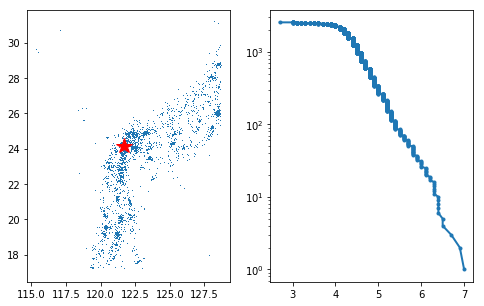

In [13]:
plt.figure(figsize=(8,5))
plt.clf()
ax1=plt.subplot('121')
ax2=plt.subplot('122')
ax1.plot(etas.catalog['lon'], etas.catalog['lat'], ',')
ax1.plot([mainshock['lon']], [mainshock['lat']], marker='*', color='r', ms=16, zorder=11)
#
ax2.plot([m for m in reversed(sorted(etas.catalog['mag']))], numpy.arange(1,len(etas.catalog)+1),
         '.-', lw=2.)
ax2.set_yscale('log')

In [14]:
#print(etas.mc, etas.mc_etas)

### ETAS cross-sections:
- What is the best way to produce an ETAS cross section?
#### PCA and coordinate rotation method(s):
- Start with a more or less contemporary method; compute (global) PCA; rotate along the major axis; cross section is the median "x'" row.
  - Variations: mean-subtract via (un-) weighted or custom location (to specify the center of rotation)
  - ???
##### Comment on this method:
- Straight forward(ish) in principle, and fairly conventional in the Physics community, but potentially compute intensive, and clumsy to customize or do anything but straight lines.
- Also, this breaks the grid-symmetry of the lattice (it rotates the whole lattice), so plotting, etc. of the rotated frame would require reconstruction onto a new lattice.
- Even if we don't want to do gridded plots, it moves points off of the original lattice, for whatever that's worth.

#### NN to any user defined path:
- Designate a path -- it can be a straight line.
- Use an *sklearn* NN finding algorithm to find the closest $n$ points in the ETAS map to each point in the path (we will need to define our path to have sufficient resolution)
- Compute the z-value for each point on the path from a mean (presumably weighted by distance) between each point on the path and its NN values.
- Note: we could generalize this to use the entie map for each point... which might be interesting as well.
- Note: we'll need some sort of Omori like weighting, to handle singularities, but this can be more or less arbitrarily chosen.... and it's just the weighting, so it should not have huge effect in most cases.
- **Note possible application:** We might use something like this to stitch together smaller earthquakes (ETAS halos) to estimate rupture-hazard zones for larger events (aka, stitch togetehr hot-spots that are more or less in a line, or consistent with a geophysical profile (regional faults) of some sort).


In [15]:
# plot a cross-section of ETAS. let's get smart about this and do a PCA on the xyz field...
#XYw = numpy.array([[x*z, y*z] for x,y,z in etas.ETAS_array])
#
XYw = numpy.array([etas.ETAS_array['x']*etas.ETAS_array['z'], etas.ETAS_array['y']*etas.ETAS_array['z']]).T
#
w_cov = numpy.cov(XYw, rowvar=False)
eig_vals, eig_vecs = numpy.linalg.eig(w_cov)
#
print('eigs: ', len(eig_vecs), len(eig_vals))
print('eigs: ', eig_vecs, eig_vals)
#

eigs:  2 2
eigs:  [[ 0.98104701 -0.19376987]
 [ 0.19376987  0.98104701]] [  1.56537272e-14   7.76638314e-20]


dx, dy:  0.1 0.1


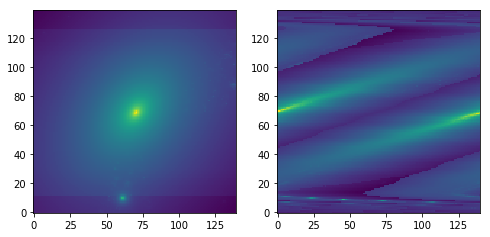

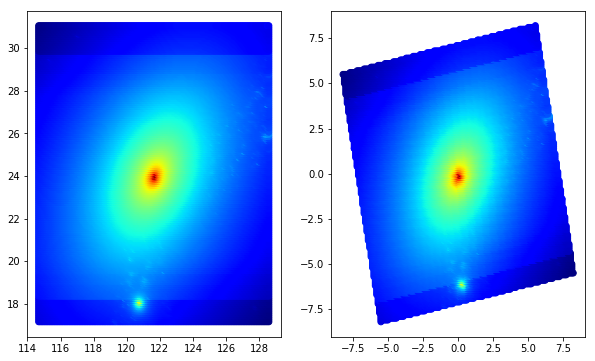

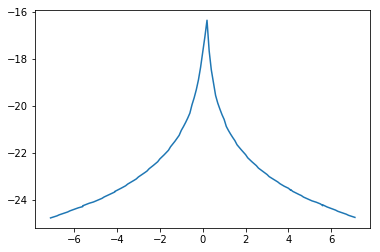

In [16]:
XY_prime = etas.ETAS_array.copy()
XY_prime['x'] -= numpy.mean(XY_prime['x'])
XY_prime['y'] -= numpy.mean(XY_prime['y'])
XY_prime['z'] = numpy.log(XY_prime['z'])
#
X  = sorted(set(XY_prime['x']))
dx = numpy.mean(numpy.diff(X))
Y  = sorted(set(XY_prime['y']))
dy = numpy.mean(numpy.diff(Y))
#
#XY_prime['x'], XY_prime['y'] = numpy.dot(eig_vecs, numpy.array([XY_prime['x'], XY_prime['y']]))
#XY_prime = sorted(list(XY_prime), key=lambda rw: (rw[0], rw[1]))
#
#print('lens: ', len(XY_prime), len(XYw))
plt.figure(figsize=(8,6))
ax1 = plt.subplot('121')
ax2 = plt.subplot('122')
ax1.imshow(numpy.reshape(XY_prime['z'], (len(Y), len(X))), origin='lower')
#
XY_prime['x'], XY_prime['y'] = numpy.dot(eig_vecs, numpy.array([XY_prime['x'], XY_prime['y']]))
#
# now, we need to 'snap' (x,y) to a regular lattice. a few options for this, like x' = x - x%dx
#   but we nominally want to snap to the closest point... we also need to fill in the lattice, so this is
#   not super simple if we want to do contours, imshow(), etc. but to just get data... we can do this.
#
#XY_prime['x'] -= XY_prime['x']%dx
#XY_prime['y'] -= XY_prime['y']%dy

XY_prime['x'] = dx*numpy.round(XY_prime['x']/dx)
XY_prime['y'] = dy*numpy.round(XY_prime['y']/dy)


print('dx, dy: ', dx, dy)
#XY_prime = sorted([[x,y,z] for x,y,z in XY_prime], key=lambda rw: (rw[0], rw[1]))
#
XY_prime.sort(order = ('y', 'x'))
#
ax2.imshow(numpy.reshape([z for x,y,z in XY_prime], (len(X), len(Y))), origin='lower')
#ax2.contourf(XY_prime['x'], XY_prime['y'], XY_prime['z'], N=15)

#plt.figure(figsize=(10,6))
#plt.clf()
#ax1 = plt.subplot('121')
#ax2 = plt.subplot('122')
# ax1.set_ylim(min(Y), max(Y))
# ax1.set_xlim(min(X), max(X))
# ax2.set_ylim(min(Y), max(Y))
# ax2.set_xlim(min(X), max(X))

#
# z0 = sorted(etas.ETAS_array['z'])[int(.8*len(etas.ETAS_array))]
# for x,y,z in etas.ETAS_array:
#     if z>=z0:
#         ax1.plot([x], [y], color='r', marker='.')
# for x,y,z in XY_prime:
#     if numpy.exp(z)>=z0:
#         ax2.plot([x], [y], color='b', marker='.')

plt.figure(figsize=(10,6))
plt.clf()
ax1 = plt.subplot('121')
ax2 = plt.subplot('122')
ax2.scatter(x=XY_prime['x'], y=XY_prime['y'], c=XY_prime['z'], cmap='jet')
ax1.scatter(x=etas.ETAS_array['x'], y=etas.ETAS_array['y'], c=numpy.log(etas.ETAS_array['z']),
            cmap='jet')
#
# now, get the median row, along the x' axis. note: we want to be careful to get an actual y-value, not
#  an intermediate, and the data are no longer properly gridded... but the are snapped to a grid.
y_med = sorted(XY_prime['y'])[int(.5*len(XY_prime))]
x_section = [[x,z] for x,y,z in XY_prime if y==y_med]
plt.figure()
ax=plt.gca()
ax.plot(*zip(*x_section), ls='-', marker='')

#
#
#plt.figure()
##my_xy = [[x,y,z] for x,y in zip(etas.catalog['lon'], etas['lat']) if x>=42.25 and x<=42.75]
#my_xyz = [[x,y,z] for x,y,z in etas.ETAS_array if y>=42.25 and y<=42.75]
#plt.figure(figsize=(8,6))
#plt.plot([x for x,y,z in my_xyz ], [z for x,y,z in my_xyz], '.')

#etas.make_etas_contour_map()

In [17]:
mycat = atp.catfromANSS(lon=lons, lat=lats, minMag=2.5,
                        dates0=[dtm.datetime(2005,1,1, tzinfo=tzutc), None], Nmax=None, fout=None, rec_array=True)


data handle fetched...
 no file.


data handle fetched...
 no file.
[ (datetime.datetime(2017, 2, 7, 8, 21, 6, 450000), 18.8798, 121.0238, 4.5, 46.56, 736367.3479913195)
 (datetime.datetime(2017, 2, 10, 17, 12, 53, 390000), 22.8247, 120.2282, 5.3, 15.74, 736370.7172846065)
 (datetime.datetime(2017, 2, 14, 16, 26, 19, 680000), 23.1982, 125.0832, 5.0, 10.0, 736374.68495)
 (datetime.datetime(2017, 2, 17, 1, 18, 4, 990000), 25.1201, 125.1252, 4.7, 18.97, 736377.0542244213)
 (datetime.datetime(2017, 2, 27, 16, 18, 31, 30000), 24.2425, 122.8771, 4.9, 45.58, 736387.6795258102)]
2017-02-27T16:18:31.030000


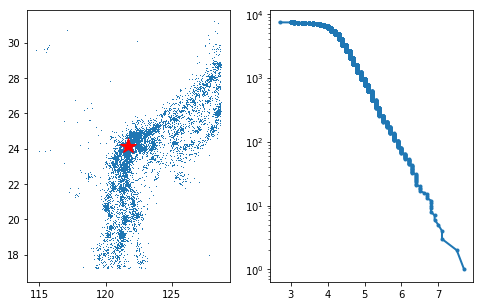

In [18]:
# TODO: take a look at the ComCat library, which should combine multiple catalogs and may provide
#  tensor solution information, like strike, etc.
#
test_cat = atp.catfromANSS(lat=lats, lon=lons, minMag=1.5,
                           dates0=[dtm.datetime(1990,1,1, tzinfo=pytz.utc), dtm.datetime.now(pytz.utc)])


plt.figure()
plt.clf()
#plt.plot(test_cat['lon'], test_cat['lat'], '.')
print(test_cat[-5:])
print(max(test_cat['event_date']))

plt.figure(figsize=(8,5))
plt.clf()
ax1=plt.subplot('121')
ax2=plt.subplot('122')
ax1.plot(test_cat['lon'], test_cat['lat'], ',')
ax1.plot([mainshock['lon']], [mainshock['lat']], marker='*', color='r', ms=16, zorder=11)
#
ax2.plot([m for m in reversed(sorted(test_cat['mag']))], numpy.arange(1,len(test_cat)+1),
         '.-', lw=2.)
ax2.set_yscale('log')

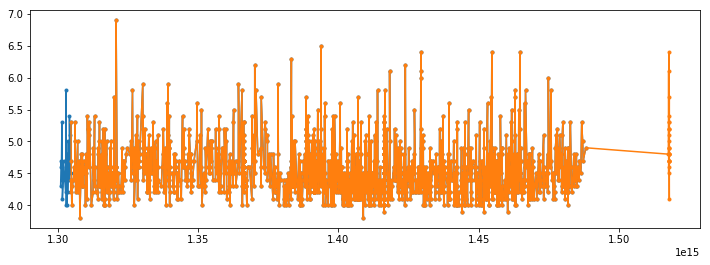

In [19]:
plt.figure(figsize=(12,4))
plt.clf()
ax=plt.gca()
n=1500
ax.plot(test_cat['event_date'][-n:], test_cat['mag'][-n:], '.-')
ax.plot(etas.catalog['event_date'][-n:], etas.catalog['mag'][-n:], '.-')

In [20]:
test_cat[-10:]

rec.array([ (datetime.datetime(2017, 1, 20, 15, 16, 5, 720000), 24.9274, 125.3793, 4.3, 32.57, 736349.6361773148),
 (datetime.datetime(2017, 1, 25, 7, 33, 0, 340000), 24.1817, 122.0675, 4.6, 10.0, 736354.3145872685),
 (datetime.datetime(2017, 1, 31, 12, 0, 8, 40001), 25.1615, 127.092, 4.6, 10.0, 736360.5000930555),
 (datetime.datetime(2017, 1, 31, 14, 46, 25, 730000), 26.0241, 126.2905, 4.4, 15.38, 736360.6155755786),
 (datetime.datetime(2017, 1, 31, 23, 24, 9, 10000), 27.347, 127.4308, 4.7, 113.87, 736360.9751042824),
 (datetime.datetime(2017, 2, 7, 8, 21, 6, 450000), 18.8798, 121.0238, 4.5, 46.56, 736367.3479913195),
 (datetime.datetime(2017, 2, 10, 17, 12, 53, 390000), 22.8247, 120.2282, 5.3, 15.74, 736370.7172846065),
 (datetime.datetime(2017, 2, 14, 16, 26, 19, 680000), 23.1982, 125.0832, 5.0, 10.0, 736374.68495),
 (datetime.datetime(2017, 2, 17, 1, 18, 4, 990000), 25.1201, 125.1252, 4.7, 18.97, 736377.0542244213),
 (datetime.datetime(2017, 2, 27, 16, 18, 31, 30000), 24.2425, 122.